In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.drop(columns=["CustomerID"])

# Convert categorical data to numerical
le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


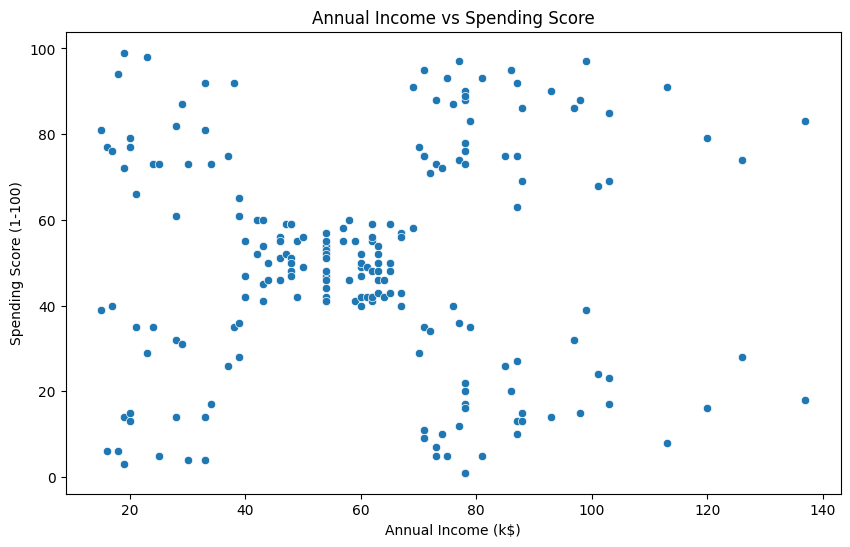

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [5]:
data = data[["Annual Income (k$)","Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


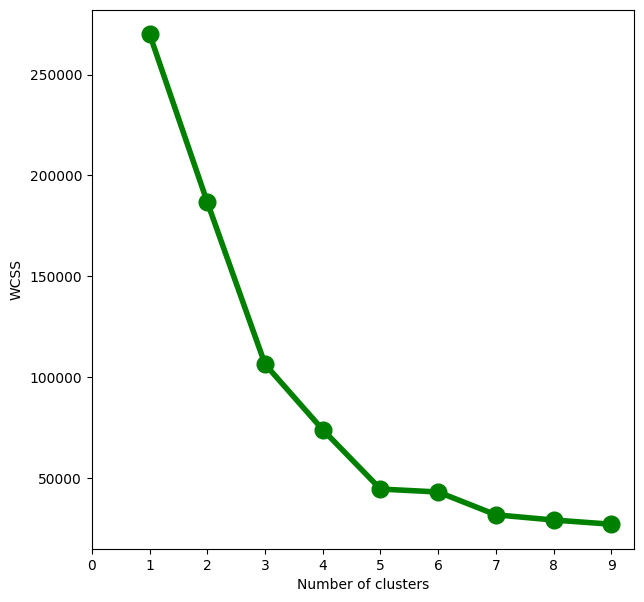

In [6]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data[["Annual Income (k$)","Spending Score (1-100)"]])
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,10),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(10))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 100, n_init = 5, random_state = 42)
y_clusters = model.fit_predict(data[["Annual Income (k$)","Spending Score (1-100)"]])
data['cluster'] = y_clusters


In [9]:
data.shape

(200, 5)

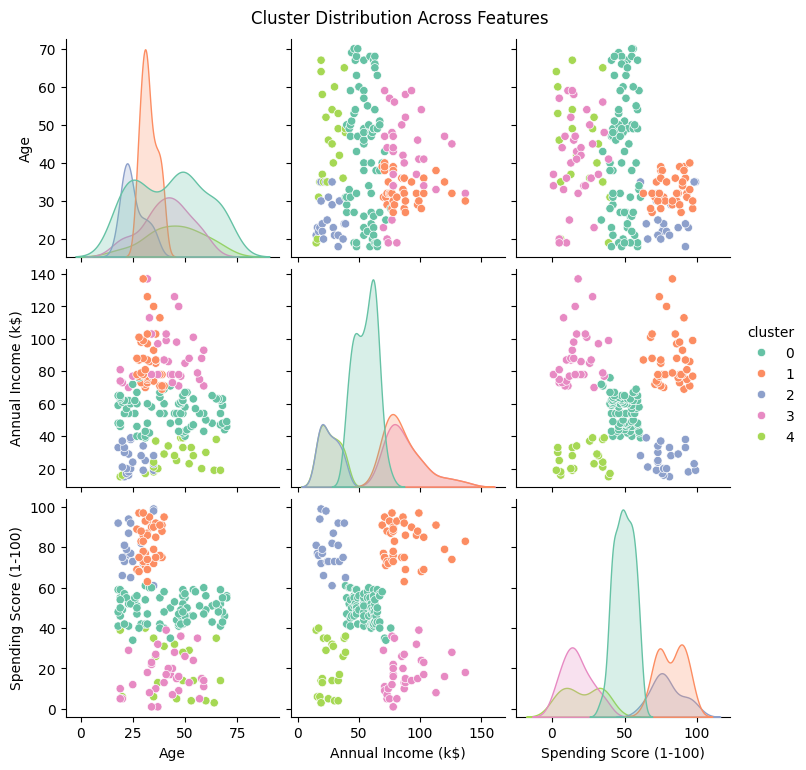

In [26]:
# Assuming df already has 'Cluster' from kmeans.labels_
features_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

sns.pairplot(data[features_to_plot + ['cluster']], hue='cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Cluster Distribution Across Features", y=1.02)
plt.show()

In [11]:
#Extract centroids for Annual Income (k$), Spending Score (1-100)
centroids = model.cluster_centers_  # Already contains only the 2 features
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['cluster'] = 'Centroid'



In [12]:
print(centroids_df)

   Annual Income (k$)  Spending Score (1-100)   cluster
0           55.296296               49.518519  Centroid
1           86.538462               82.128205  Centroid
2           25.727273               79.363636  Centroid
3           88.200000               17.114286  Centroid
4           26.304348               20.913043  Centroid


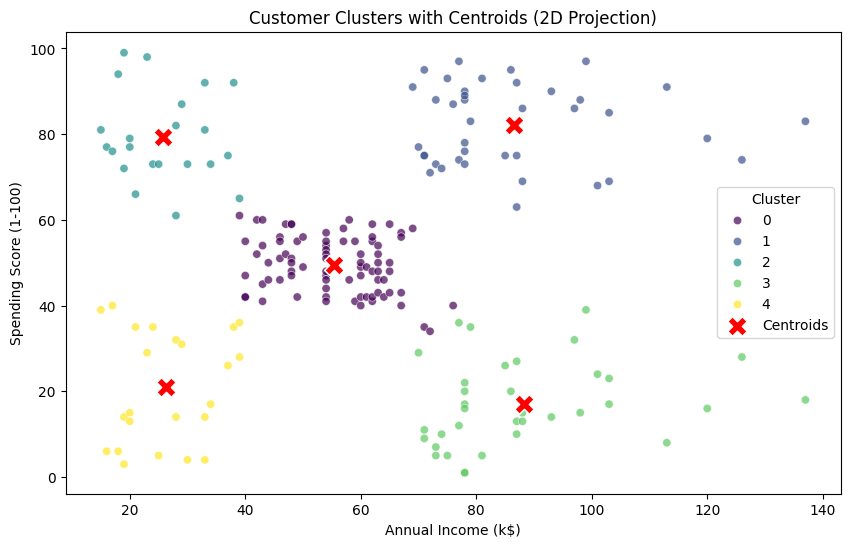

In [13]:
# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='cluster', 
    palette='viridis',
    alpha=0.7
)
sns.scatterplot(
    data=centroids_df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    marker='X', 
    s=200, 
    color='red', 
    label='Centroids'
)
plt.title("Customer Clusters with Centroids (2D Projection)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

In [14]:
# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y_clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


In [15]:
from sklearn.preprocessing import StandardScaler

# Select features (e.g., 'Annual Income' and 'Spending Score')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [16]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

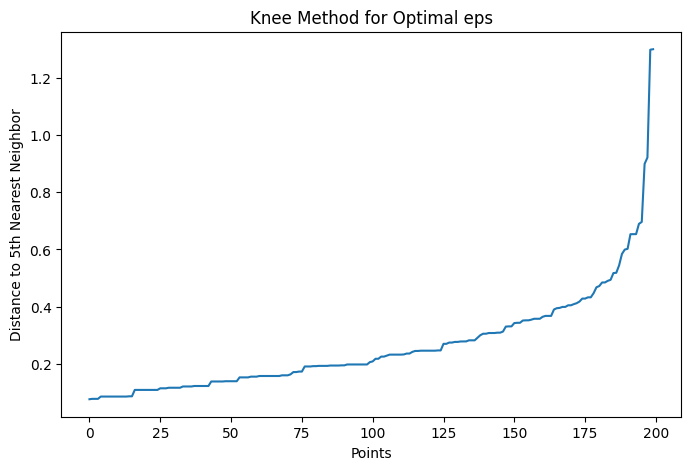

In [17]:


neighbors = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:, 4], axis=0)  # Sort distances to the 5th nearest neighbor

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('Knee Method for Optimal eps')
plt.show()

In [18]:


dbscan = DBSCAN(eps=0.4, min_samples=4)
clusters = dbscan.fit_predict(X)

# Add cluster labels to the original data
data['DBSCAN_Cluster'] = clusters
print("Cluster distribution:", data['DBSCAN_Cluster'].value_counts())

Cluster distribution: DBSCAN_Cluster
 0    126
 1     33
 2     27
-1     14
Name: count, dtype: int64


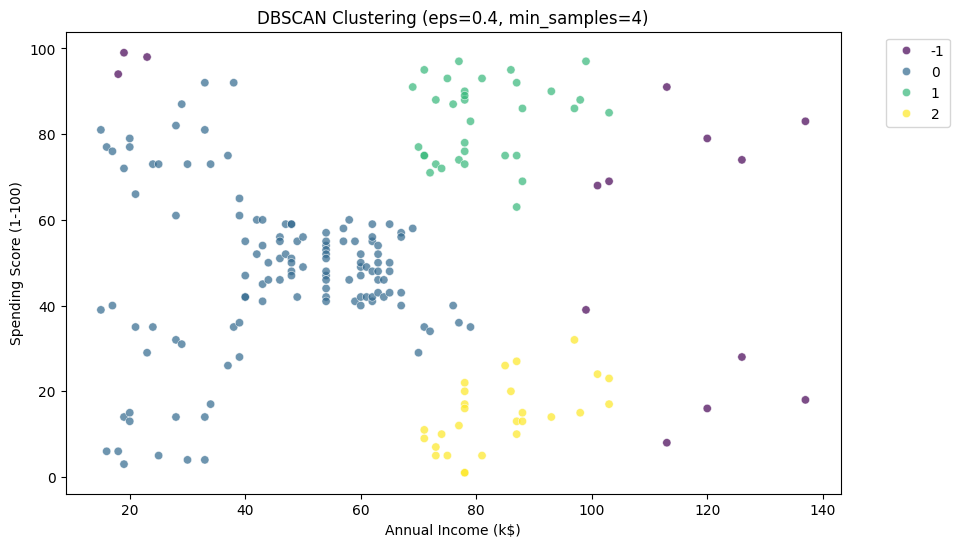

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='DBSCAN_Cluster', palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.4, min_samples=4)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
# Group by K-Means cluster and compute mean values
kmeans_stats = data.groupby('cluster').agg({
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean',
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0]  # Most common gender in cluster
}).rename(columns={'Spending Score (1-100)': 'Avg Spending Score'})

print("K-Means Cluster Averages:")
print(kmeans_stats)

K-Means Cluster Averages:
         Avg Spending Score  Annual Income (k$)        Age  Gender
cluster                                                           
0                 49.518519           55.296296  42.716049       0
1                 82.128205           86.538462  32.692308       0
2                 79.363636           25.727273  25.272727       0
3                 17.114286           88.200000  41.114286       1
4                 20.913043           26.304348  45.217391       0


In [21]:
# Group by DBSCAN cluster (include noise)
dbscan_stats = data.groupby('DBSCAN_Cluster').agg({
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean',
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0]
}).rename(columns={'Spending Score (1-100)': 'Avg Spending Score'})

print("\nDBSCAN Cluster Averages (Noise = -1):")
print(dbscan_stats)


DBSCAN Cluster Averages (Noise = -1):
                Avg Spending Score  Annual Income (k$)        Age  Gender
DBSCAN_Cluster                                                           
-1                       61.714286           96.785714  34.714286       0
 0                       47.992063           46.158730  40.396825       0
 1                       83.000000           81.060606  32.727273       0
 2                       14.444444           83.925926  41.259259       1


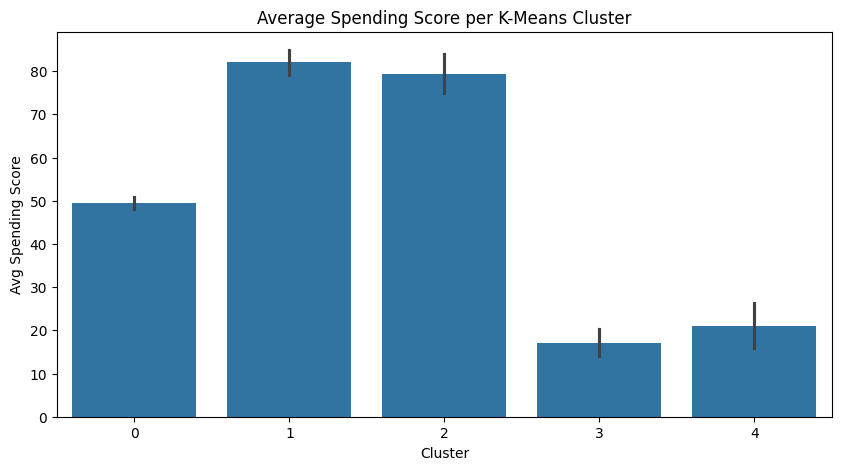

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='cluster', y='Spending Score (1-100)', estimator='mean')
plt.title('Average Spending Score per K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Spending Score')
plt.show()